# P2 A - Regresión Lineal
Hecho por:
- Jaime Benedi
- Miguel Sevilla

En una secuencia de tiempo de 1 minuto, tenemos una pulsera inteligente que mide la frecuencia
cardiaca (FC). Nos gustaría saber cuál es la regresión lineal de dichos pares tiempo y FC para saber en
qué medida están incrementando los valores o disminuyendo.
El primer paso será generar los datos realistas a partir de un coeficiente y una variación aleatoria. Para
ello, se debe generar un array “x” con los instantes de tiempos (i.e. de 1 a 60, representando los
segundos de un minuto) y un array “y” con las frecuencias cardiacas para dichos tiempos. Por ejemplo,
podrías usar la siguiente fórmula, pero también es bueno que pruebas con otras fórmulas:
Y = 0.7*x + 60 + <número aleatorio entre -5.9 y +5.9>
Para generar “x” puedes usar función “arange(inicio, fin)” de “numpy”. Para generar “y” puedes usar
operaciones matemáticas sobre array y la operación “random.uniform(inicio, fin)” para generar los
números aleatorios. Se puede implementar en un método llamado “generarDatosFC” que devuelva
una secuencia “x, y”.
El segundo paso será implementar una función que realice toda esta parte de la práctica: que tome
estos datos generados y que haga lo siguiente.
- Adaptar los datos de entrada X para la entrada LinearRegression. En la x, se necesita [[1],
[2], …] en vez de [1, 2, …]. Se puede hacer con las “List Comprehensions”.
- Obtener el coeficiente de la función lineal aprendida y la parte independiente (i.e.
intercept), y mostrarlos por pantalla.
- Obener los datos “y” (e.g. “yLinealResult”) de la función lineal aprendida.
- Usar Matplotlib para mostrar los puntos de mediciones de FC generados y la función lineal
aprendida.
Un ejemplo de salida podría ser lo siguiente:
Coefficients: [0.70915241] Intercept:
59.47330187403128
Se observará en qué medida se puede estimar
apropiadamente la regresión lineal, comparando
los valores usados para la generación y los valores
aprendidos en la regresión lineal.
Explora otras cualidades de LinearRegression y
comenta los atributos que más te han llamado la
atención

## Librerías a usar

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Generación de datos

Definimos nuestra función para generar una muestra de datos aleatoria. Para ello, dado un array de x distribuidos a lo largo de un intervalo, le aplicamos una función para obtener datos referentes a la función a probar.

In [3]:
def generarDatosFC(minTiempo : float, maxTiempo : float, func) -> tuple[np.ndarray, np.ndarray] :
    x = np.arange(minTiempo, maxTiempo)
    return x, func(x)

La primera función sobre x a probar será la siguiente:

In [12]:
def example1FC(x:np.ndarray) -> np.ndarray:
    return 0.7*x + 60 + np.random.normal(-5.9, 5.9, x.size)

Este es el dataset generado:

In [13]:
x, y = generarDatosFC(1, 60, example1FC)
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]
[ 50.30546174  60.44750556  56.91454582  58.99517921  51.60079492
  55.32822278  61.54112528  59.58241292  69.37549601  69.44164164
  57.23747536  68.92021361  66.47557966  64.87411972  58.17501113
  56.96334581  54.85007608  63.80782438  65.11892995  58.00532743
  66.29854153  67.5170227   63.71714894  72.49374357  70.64624735
  73.86461177  66.33147641  77.51988627  76.282226    65.73208336
  80.01292815  74.29556191  80.71540493  75.80551191  73.14896526
  78.79504034  89.11480181  77.56900807  79.50804186  82.07215946
  77.73696922  81.86963913  84.96578668  89.4594405   89.24611305
  96.60881169  86.52597457  88.55485639  93.54827407  93.01618594
  88.25859582  91.78922119  91.53296153  90.48451662  94.50581177
  88.07426892 107.60949166  84.31884628 100.97558279]


Para el uso de la clase `LinearRegression` tenemos que adaptar x como una lista de listas con los elementos sobre los que estudiar su regresión

In [14]:
# Comprehension list (declaración funcional de un conjunto)
xEnlisted = [[i] for i in x]
print(xEnlisted)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59]]


## Regresión Lineal

Para esta parte usaremos el modelo de la librería `SciKit` para regresiones lineales

In [15]:
# Creamos una instancia del modelo
modelo = LinearRegression()

Ajustamos el modelo a los datos de los que disponemos usando las herramientas que ofrece la clase

In [16]:
# Construye una regresión lineal en base a unos datos poligonizados x y una salida esperada y
modelo.fit(xEnlisted, y) 

LinearRegression()

In [ ]:
# Verbose los atributos más relevantes
print("Coeficiente de la función lineal: ", modelo.coef_) # pendiente
print("Ordenada al origen: ", modelo.intercept_) # en qué valor empieza la recta
print("R^2: ", modelo.score(xEnlisted, y)) # coeficiente de determinación

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  0.8562698471211093


Observamos como los datos son parecidos a lo que nos indicaba el enunciado.

Mostramos los datos y el resultado del modelo por pantalla. Para ello, pedimos al modelo un predicción, basándose en los datos de entrada que le hemos pasado. El resultado será un array imagen de X que conformará una línea recta (la recta de regresión del modelo)

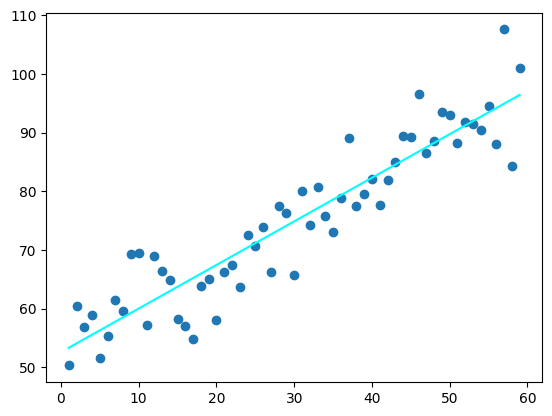

In [ ]:
yLinealResultado = modelo.predict(xEnlisted)

plt.scatter(x, y)
plt.plot(x, yLinealResultado, color='cyan')
plt.show()

## Regresión para otros ejemplos

In [11]:
def linear_regression(mini, maxi, func, model : LinearRegression) -> None :
    x, y = generarDatosFC(mini, maxi, func)
    xL = [[i] for i in x]
    model.fit(xL, y)
    
    print("Coeficiente de la función lineal: ", modelo.coef_)
    print("Ordenada al origen: ", modelo.intercept_)
    print("R^2: ", modelo.score(xL, y))
    
    plt.scatter(x,y, c='blue')
    plt.plot(x, model.predict(xL), color='red')
    plt.show()
    plt.clf()

In [58]:
def example2FC(x : np.ndarray):
    return 0.3*x + 60 + np.random.normal(-7, 7, x.size)

def example3FC(x : np.ndarray):
    return np.random.normal(60, 20, x.size)

def example4FC(x : np.ndarray):
    return 0.7*x[::-1] + 60 + np.random.normal(-5.9, 5.9, x.size)

def example5FC(x : np.ndarray):
    return np.random.normal(-2, 2, x.size) + 60

def example6FC(x : np.ndarray):
    return (0.5*x)**2 + 60 + np.random.normal(-50,50, x.size)

funciones = [example1FC, example2FC, example3FC, example4FC, example5FC, example6FC]

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  0.8251766791152216


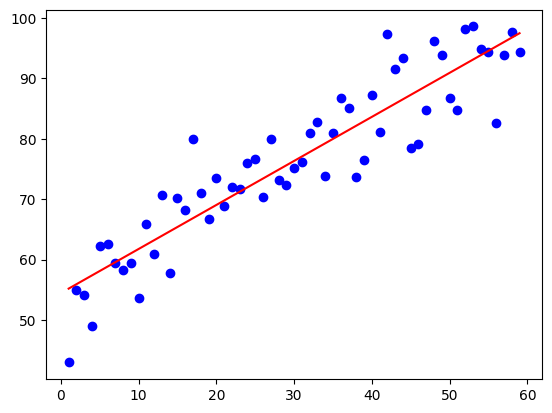

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  -2.162579443782562


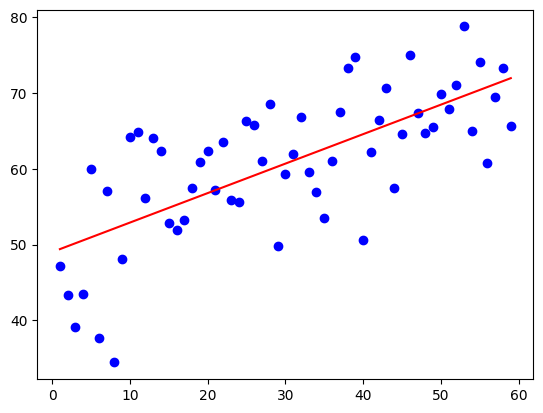

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  -0.6644990214340583


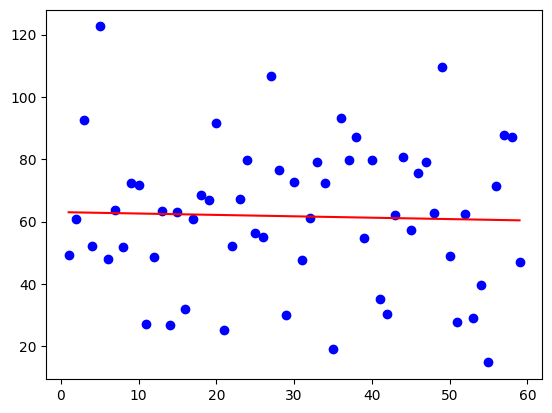

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  -2.600369634937811


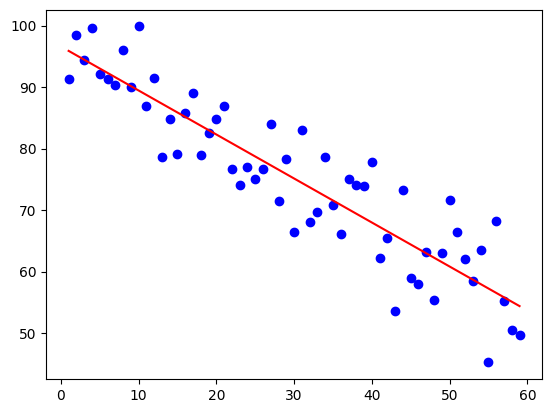

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  -122.72566065367724


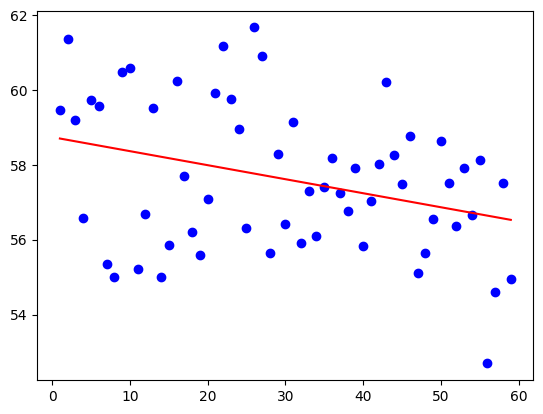

Coeficiente de la función lineal:  [0.74352392]
Ordenada al origen:  52.58380857696821
R^2:  -0.5963468160349212


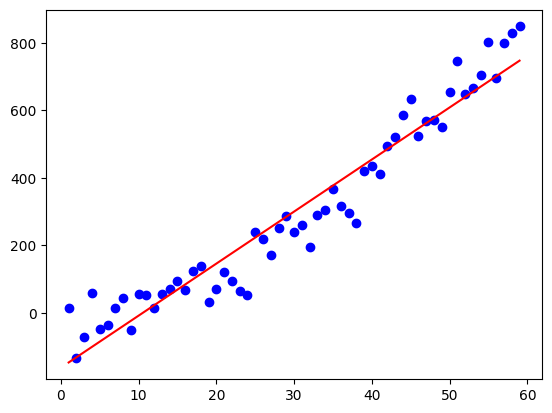

<Figure size 640x480 with 0 Axes>

In [65]:
for func in funciones :
    model = LinearRegression()
    linear_regression(1, 60, func, model)

### Observaciones
- El uso de funciones con mucha dispersión pone en cuestionamiento el uso del modelo lineal para la regresión. Técnicamente hace los cálculos correctos, pero la regresión generada no es informativa por culpa de la muestra elegida.
- La clase responde bien a relaciones proporcionales e inversamente proporcionales.
- Tiene ciertas limitaciones para regresiones exponenciales. No termina de cuadrar del todo, lo cual es entendible dado la construcción del modelo.

## Atributos a tener en cuenta

- `coef_`: Contiene el coeficiente lineal de la pendiente de cada línea del modelo
- `intercept_`: En caso de estar activo, contiene el valor de la recta cuando la variable es cero. Si no se activa, la recta de regresión empezará desde el origen de coordenadas.
- `score()`: devuelve el coeficiente de determinación de las predicciones realizadas con el modelo entrenado.